In [26]:
import os, shutil

original_dataset_dir = '../../Downloads/all/train'

base_dir = '../../Downloads/all/cats_and_dogs_small'
os.mkdir(base_dir)

train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)

train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)

validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)

validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)

test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)

test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

In [27]:
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [29]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

/home/n/anaconda2/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)       147584    
__________

In [34]:
from keras import optimizers

model.compile(
    loss='binary_crossentropy',
    optimizer=optimizers.RMSprop(lr=1e-4),
    metrics=['acc']
)


We need to preprocess images to make them tensors of floats. Keras has this, bless it!

In [35]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1.255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary'
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary'
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [36]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)    
    break

('data batch shape:', (20, 150, 150, 3))
('labels batch shape:', (20,))


In [37]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50
)

Epoch 1/30
100/100 [==============================] - 10s 97ms/step - loss: 0.6937 - acc: 0.5220 - val_loss: 7.8951 - val_acc: 0.5000
Epoch 2/30
100/100 [==============================] - 6s 60ms/step - loss: 0.6694 - acc: 0.5785 - val_loss: 5.4415 - val_acc: 0.6370
Epoch 3/30
100/100 [==============================] - 6s 60ms/step - loss: 0.6250 - acc: 0.6670 - val_loss: 5.7859 - val_acc: 0.6290
Epoch 4/30
100/100 [==============================] - 6s 59ms/step - loss: 0.5803 - acc: 0.6915 - val_loss: 6.1158 - val_acc: 0.6090
Epoch 5/30
100/100 [==============================] - 6s 59ms/step - loss: 0.5384 - acc: 0.7220 - val_loss: 5.4444 - val_acc: 0.6550
Epoch 6/30
100/100 [==============================] - 6s 59ms/step - loss: 0.5240 - acc: 0.7335 - val_loss: 5.2462 - val_acc: 0.6600
Epoch 7/30
100/100 [==============================] - 6s 59ms/step - loss: 0.4829 - acc: 0.7630 - val_loss: 5.0423 - val_acc: 0.6780
Epoch 8/30
100/100 [==============================] - 6s 59ms/step -

In [38]:
model.save('cats_and_dogs_small_1.h5')

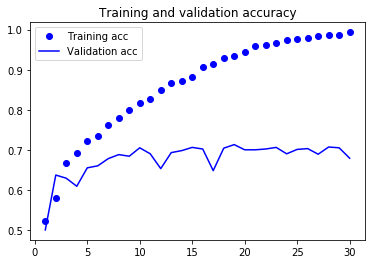

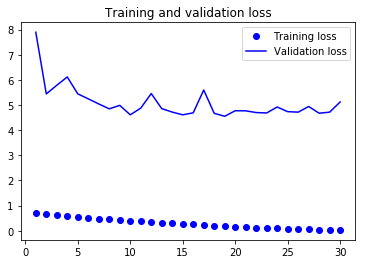

In [40]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [61]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

model.compile(
    loss='binary_crossentropy',
    optimizer=optimizers.RMSprop(lr=1e-4),
    metrics=['acc']
)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 15, 15, 128)       147584    
__________

We're overfitting due to low amount of training data. We can transform the images so they appear new(ish). Only transform ("augment") the training data, not test data, obvs.

In [43]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)
test_datagen = ImageDataGenerator(rescale=1.255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary'
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary'
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [62]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=100,
    validation_data=validation_generator,
    validation_steps=50
)

model.save('cats_and_dogs_small_2.h5')

Epoch 1/100
100/100 [==============================] - 14s 136ms/step - loss: 0.6940 - acc: 0.5170 - val_loss: 7.8404 - val_acc: 0.5040
Epoch 2/100
100/100 [==============================] - 13s 127ms/step - loss: 0.6816 - acc: 0.5615 - val_loss: 7.7032 - val_acc: 0.5080
Epoch 3/100
100/100 [==============================] - 13s 129ms/step - loss: 0.6745 - acc: 0.5610 - val_loss: 7.3002 - val_acc: 0.5320
Epoch 4/100
100/100 [==============================] - 13s 134ms/step - loss: 0.6612 - acc: 0.6035 - val_loss: 7.4456 - val_acc: 0.5240
Epoch 5/100
100/100 [==============================] - 14s 137ms/step - loss: 0.6400 - acc: 0.6100 - val_loss: 6.9771 - val_acc: 0.5570
Epoch 6/100
100/100 [==============================] - 14s 136ms/step - loss: 0.6263 - acc: 0.6450 - val_loss: 7.1412 - val_acc: 0.5450
Epoch 7/100
100/100 [==============================] - 14s 138ms/step - loss: 0.6207 - acc: 0.6510 - val_loss: 6.8986 - val_acc: 0.5620
Epoch 8/100
100/100 [===========================

Epoch 61/100
100/100 [==============================] - 14s 137ms/step - loss: 0.4407 - acc: 0.8015 - val_loss: 6.0749 - val_acc: 0.6130
Epoch 62/100
100/100 [==============================] - 14s 137ms/step - loss: 0.4373 - acc: 0.7940 - val_loss: 4.7233 - val_acc: 0.7020
Epoch 63/100
100/100 [==============================] - 14s 136ms/step - loss: 0.4544 - acc: 0.7780 - val_loss: 5.4009 - val_acc: 0.6580
Epoch 64/100
100/100 [==============================] - 14s 138ms/step - loss: 0.4403 - acc: 0.8020 - val_loss: 6.1233 - val_acc: 0.6150
Epoch 65/100
100/100 [==============================] - 13s 135ms/step - loss: 0.4306 - acc: 0.8005 - val_loss: 5.5549 - val_acc: 0.6490
Epoch 66/100
100/100 [==============================] - 13s 135ms/step - loss: 0.4376 - acc: 0.7970 - val_loss: 5.3423 - val_acc: 0.6610
Epoch 67/100
100/100 [==============================] - 15s 153ms/step - loss: 0.4151 - acc: 0.8130 - val_loss: 5.3906 - val_acc: 0.6590
Epoch 68/100
100/100 [===================

In [57]:
history.history['acc']

[0.5090000009536744,
 0.5340000027418137,
 0.5635000026226044,
 0.594499998986721,
 0.6060000005364418,
 0.6254999995231628,
 0.6434999972581863,
 0.6514999997615815,
 0.6629999980330468,
 0.6924999976158142,
 0.6829999977350235,
 0.6889999997615814,
 0.6789999985694886,
 0.6985000011324882,
 0.7060000002384186,
 0.6969999995827675,
 0.7179999995231628,
 0.7075000029802322,
 0.705999998152256,
 0.7064999973773957,
 0.7194999986886979,
 0.71,
 0.7215000003576278,
 0.7254999989271164,
 0.7204999983310699,
 0.7469999992847443,
 0.7295000022649765,
 0.7395000004768372,
 0.7354999992251396,
 0.7304999989271164]